## Korelasyon Analizi
Diğişkenler arasında ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bir yöntemdir.

In [2]:
from IPython.display import Image
Image(url="./img/korelasyon-analizi-1.jpg")

---

Bahşiş ile ödenen hesap arasında korelasyon var mı?

In [4]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


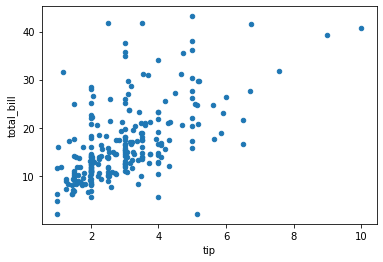

In [9]:
df.plot.scatter("tip","total_bill");

---

### Varsayım Kontrolü

In [12]:
from scipy.stats import shapiro

In [13]:
shapiro(df["tip"])

(0.897811233997345, 8.20057563521992e-12)

In [14]:
shapiro(df["total_bill"])

(0.9135652184486389, 1.1060377613780759e-10)

iki değişkene baktığımızda ikisinin de normallik varsayımının sağlanmadığını görüyoruz. Bunun anlamı: İki değişken arasında anlamlı bir fark vardır.

---

### Hipotez Testi
#### Korelasyon Katsayısı

In [17]:
df["tip"].corr(df["total_bill"])

0.5766634471096374

In [19]:
df["tip"].corr(df["total_bill"], method="spearman")

0.593691939408997

Değişkenler arasında pozitif yönlü bir ilişki var. İlişkinin yönü orta şiddetli.

#### Korelasyonun Anlamlılığının Testi

In [20]:
from scipy.stats.stats import pearsonr

pearsonr(df["tip"],df["total_bill"])

(0.5766634471096381, 5.018290084948419e-23)

Pvalue değeri 0.05'ten daha küçük olduğu için değişkenler arasında anlamlı bir ilişki yoktur diyen H0 hipotezini red ediyoruz. Yani değişkenler arasında anlamlı bir korelasyon vardır.

---


#### Nonparametrik Hipotez Testi

In [23]:
from scipy.stats import stats

stats.spearmanr(df["tip"],df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [24]:
stats.kendalltau(df["tip"],df["total_bill"])

KendalltauResult(correlation=0.4400790074919885, pvalue=7.131027725873721e-24)